In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img)
    #plt.show()
    return img

In [3]:
def edge_mask(img, line_size, blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)

    edges=cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)

    #plt.imshow(edges, cmap= "binary")
    #plt.show()

    return edges

In [4]:
def color_quantization(img,k):

    data=np.float32(img).reshape((-1,3))

    criteria= (cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center= np.uint8(center)

    result = center[label.flatten()]
    result=result.reshape(img.shape)
    
    
    #plt.imshow(result)
    #plt.title(k)
    #plt.show()

    return result

In [5]:
def Blurr(blurred):
    plt.imshow(blurred)
    plt.show()

In [6]:
def cartoonizer(d,k,line_size, blur_value):
    filename = "image.jpg"
    img= read_file(filename)
    org_img= np.copy(img)
    img1 = color_quantization(img , k)
    blurred=cv2.bilateralFilter(img1, d, sigmaColor=200, sigmaSpace=200)
    edges= edge_mask(img, line_size, blur_value)
    c=cv2.bitwise_and(blurred, blurred, mask=edges)
    
    #Blurr(blurred)
    plt.imshow(org_img)
    plt.title("Original Image")
    plt.show()
    str= "Cartoonized Image {} {} {} {}".format(d,k,line_size, blur_value)
    plt.imshow(c)
    plt.title(str)
    plt.show()

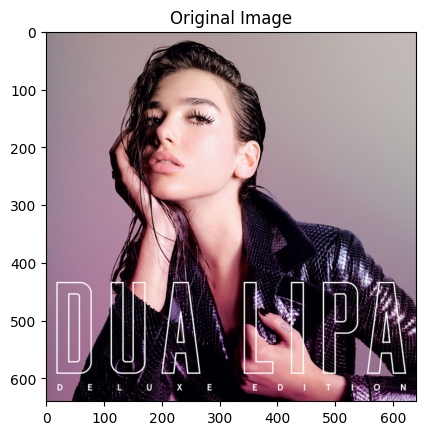

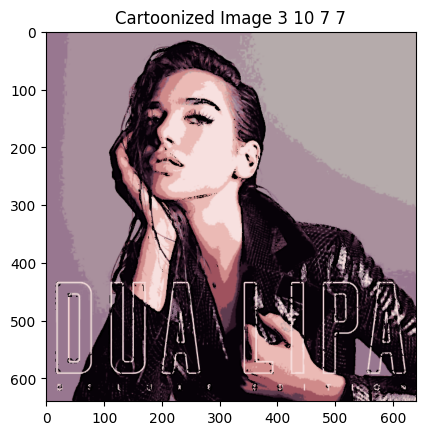

In [7]:
cartoonizer(3,10,7,7)